# <ins>**Livrable 2 : Étude de la réponse fréquentielle et filtrage**</inc>
## Notre équipe :
* Galaad Goutier
* Flavio De Barros Barbosa
* Evan Bohic
* Baptiste Letellier
* Malo Rabaux
* Shahineze Kadiri

## **Table des matières :**
**Contexte**..................................................................................................................1<br> 
**Schema du filtre**............…………....….….……………..............................….…….2 <br> 
**Fonction Transfer**………...….….…………….…............................................…….3<br> 
**Justification du dimensionement**..................….…......…………….….…….4 <br> 
**Diagramme de Bode**......................................….….………...........…….….…….5 <br> 
**Simulation Du Filtre**......................................….….………...........……...............6 <br> 

### <ins>Contexte :</ins>
Dans le cadre des activités de Recherche et Développement de l'Agence Indépendante de Lutte Contre la CyberCriminalité (AIL3C),
notre objectif est de développer des solutions pour résoudre les problèmes techniques auxquels nos agents sont confrontés sur le terrain.
Suite à l’échec de l’opération impliquant l’agent K57, un besoin crucial a été mis en évidence : offrir aux agents infiltrés la possibilité de communiquer avec l’extérieur, 
même dans les scenarios où les signaux traditionnels sont bloqués ou énormément réduits.

Après une analyse des options disponibles, la solution retenue consiste à utiliser des fréquences sonores élevées, inaudibles par l'Homme, comme moyen de transmission. Dans le but de dissimulé des messages dans les communications captées par le micro déjà présent dans la pièce.

### <ins>Schéma du Filtre Passe Haut d'ordre 2</inc>

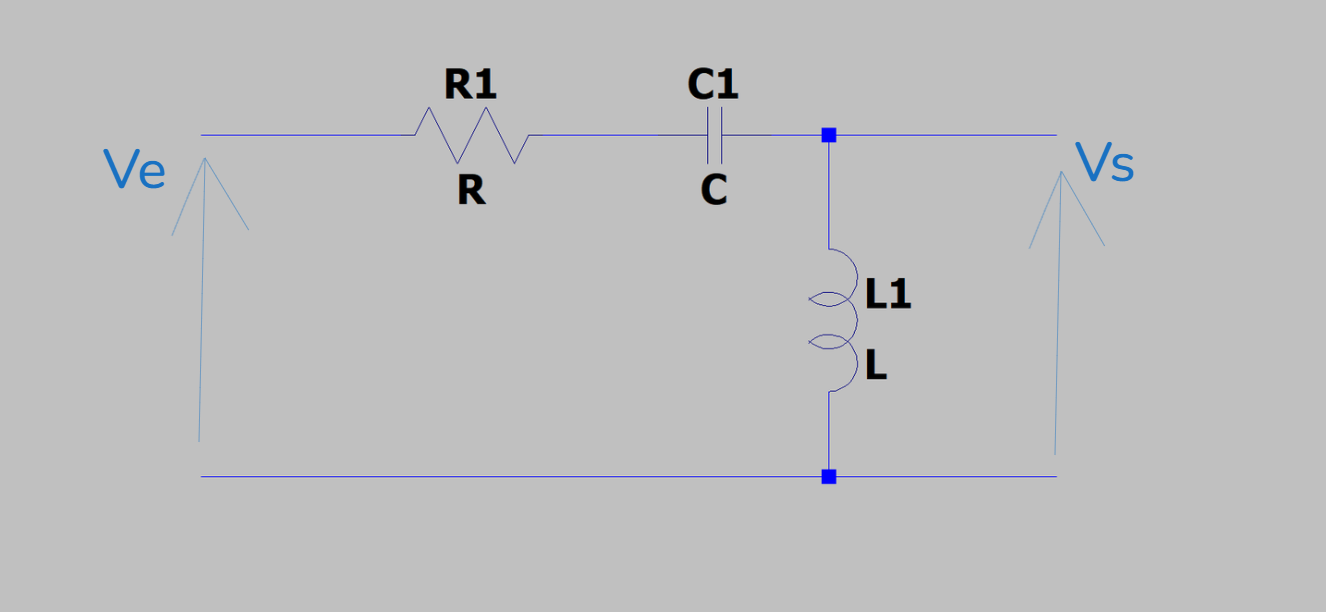

Nous avons choisi un **filtre passe haut** afin d'empêcher les ondes qui ne sont pas des ondes ultrasons de brouiller notre signal codé avec des ondes ultrasonores(notre fréquence de coupure est de 20kHz pour ne laisser passer que les ultras sons).

### <ins>La Fonction Transfert du Filtre</inc>

#### <ins>Filtre passe haut</ins>

$$\frac{V_{s}}{V_{e}}=H(\omega)= \frac{Z_l}{Z_l+Z_c+Z_r}$$
$$H(\omega)= \frac{jL\omega}{jL\omega+R + \frac{1}{J\omega C}}$$

  
$$ H(\omega)= \frac{jL\omega}{jL\omega+R+ \frac{1}{jC\omega}} {\times jC\omega\atop \times jC\omega} \;\;{\text{(on multiplie par }j \omega C \text{ pour éliminer la} \atop \text{fraction présente dans le dénominateur)}}= \frac{-LC\omega^{2}}{jRC\omega+1-LC\omega^{2}}$$

#### <ins>On cherche à déterminer ω0 tel que</ins> : $(\frac{\omega}{\omega_0})^2$ soit le facteur de $j^2$

$$LC\omega^{2}= \left( \frac{\omega}{\omega_{0}} \right)^{2} \leftrightarrow  \sqrt{ LC }\,\omega= \frac{\omega}{\omega_{0}}$$
$$\sqrt{ LC  }= \frac{1}{\omega_{0}}\implies \omega_{0}= \frac{1}{\sqrt{ LC }}$$

#### <ins>On fais apparaitre Q dans l'équation :</ins>

$$Q=\frac{1}{R}\times \sqrt{ \frac{L}{C} } \qquad x= \frac{\omega}{\omega_{0}}$$
$$H(\omega)= \frac{-x^{2}}{1+jRc\omega-x^{2}}$$
$$R=\frac{1}{q\,\sqrt{ \frac{L}{C} }}$$
$$H(\omega)=\frac{-x^{2}}{1+j \frac{1}{Q}\, \sqrt{ \frac{L}{C} }*C\omega-x^{2}}=\frac{-x^{2}}{1+ j\frac{1}{Q}* \frac{1}{\omega_{0}}*\omega-x^{2}}$$
$$H(\omega)= \frac{-x^{2}}{1+ j\frac{\omega}{Q\omega_{0}}-x^{2}}$$

**pour plus de lisibilité on remplace** $\frac{1}{Q}$ **par 2m** et on pose : 
$$m=\frac{1}{2Q}$$

$$m=\frac{1}{2Q}=\frac{1}{2\left( \frac{1}{R}\sqrt{ \frac{L}{C} } \right)}$$
**Donc :**
$$H(\omega)= \frac{-x^{2}}{1+ j\,2m\frac{\omega}{\omega_{0}}-x^{2}}$$
voici notre **solution finale** :
$$H(\omega)= \frac{-x^{2}}{1+ j*2\frac{1}{2\left( \frac{1}{R}*\sqrt{ \frac{L}{C} } \right)}*\frac{\omega}{\omega_{0}}-x^{2}}$$

  

$$

$$

#### <ins>On cherhce à obtenir la Gain en décibel : </ins>

  

$$G_{db}= 20\log(\lvert H(\omega) \rvert )$$
$$\lvert H(\omega) \rvert = \frac{\lvert -x^{2} \rvert }{\left\lvert  1+j \frac{\omega}{Q\omega_{0}}-x^{2}  \right\rvert }$$
$$\lvert H(\omega) \rvert = \frac{x^{2}}{\sqrt{ (1-x^{2})^{2}+\left( \frac{\omega}{\omega_{0}Q} \right)^{2} }}$$
$$G_{db}= 20\log\left( \frac{x^{2}}{\sqrt{ (1-x^{2})^{2}+\left( \frac{\omega}{\omega_{0}Q} \right)^{2} }} \right)$$
$$G_{db}=20\log x^{2}-10\log\left( (1-x^{2})^{2}+\left( \frac{\omega}{Q\omega_{0}} \right)^{2} \right)$$
$$G_{db}= 40\log x-10\log\left( (1-x^{2})^{2}+\left( \frac{\omega}{Q\omega_{0}} \right)^{2} \right)$$

#### <ins>On cherche à obtenir la phase</ins>

$$\phi= arg(\lvert H(\omega) \rvert )$$
$$=arg\,x^{2}-arg\left( 1-\left( \frac{\omega}{\omega_{0}} \right)^{2}+ \frac{\omega}{Q\omega_{0}} \right)$$
$$\text{soit } \phi=arg\;x^{2}- \tan ^{-1}\left( \frac{\left( \frac{\omega}{Q\omega_{0}} \right)}{1-x^{2}} \right)$$

#### <ins>On étudie la courbe du G_db : </ins>

$$\text{Si  }\;\omega<\omega_{0}\qquad G_{db}\to 40\log x-10\log\left( (1-x^{2})^{2}+\left( \frac{\omega}{Q\omega_{0}} \right)^{2} \right)$$
$$\text{Si  }\; \omega>\omega_{0} \qquad G_{db}\to 0$$

#### <ins>On étudie la courbe de la phase: </ins>

$$\text{Si }\; \omega<\omega_{0} \qquad \phi\to -\tan ^{-1}\left( \frac{\left( \frac{\omega}{Q\omega_{0}} \right)}{1-x^{2}} \right)$$
$$\text{Si }\, \omega=\omega_{0} \qquad \phi=-\frac{\pi}{2}$$
$$\text{Si }\; \omega>\omega_{0} \qquad \phi\to \pi -\tan ^{-1}\left( \frac{\left( \frac{\omega}{Q\omega_{0}} \right)}{1-x^{2}} \right)$$

### <ins>Justification de la taille des composants</inc> :

**On peut prendre une valeur arbitraire de C** Donc on prend $C= 1 \micro F$
$F_{c}= 20KHz=f_{0}$

$$f_{0}= \frac{\omega_{0}}{2\pi} \leftrightarrow \frac{1}{2\pi \sqrt{ LC }}$$
$$f_{e} \;2\pi=\frac{1}{\sqrt{ LC }}\to\left( \frac{1}{\omega_{0}} \right)^{2}=LC$$
$$\leftrightarrow L= \frac{\left( \frac{1}{\omega_{0}} \right)^{2}}{C}=\frac{\left( \frac{1}{2\pi*20\,000} \right)^{2}}{1._{10^{-6}}}$$
$$L=6,33._{10^{-5}}H$$
$$=63 \micro H$$
**On sait que** $2m=\frac{1}{Q}$

$$m=\frac{1}{2Q}= \frac{1}{2*\left( \frac{1}{R}\sqrt{ \frac{L}{C} } \right)}= \frac{1}{\frac{2}{R}\sqrt{ \frac{L}{C} }}$$
$$m=\frac{R}{2}\sqrt{ \frac{C}{L} } \leftrightarrow R=\frac{2m}{\sqrt{ \frac{C}{L} }}$$

**Pour trouver la valeur de m, on regarde les 3 conditions **
* **si m > 1**        alors il possède 2 fréquences de coupures
* **si 0.7 > m > 1**       alors il possède 1 fréquence de coupure
* **si m < 0.7**         le signal aura une résonnance et donc une surtension ce que l'on souhaite

Donc on prend m = 0.7

$$R= \frac{2*0.7}{\sqrt{ \frac{1_{*10^{-6}}}{6.3_{*10^{-5}}} }} = 11.11 \ohm$$




### <ins> Diagramme de Bode</inc> :

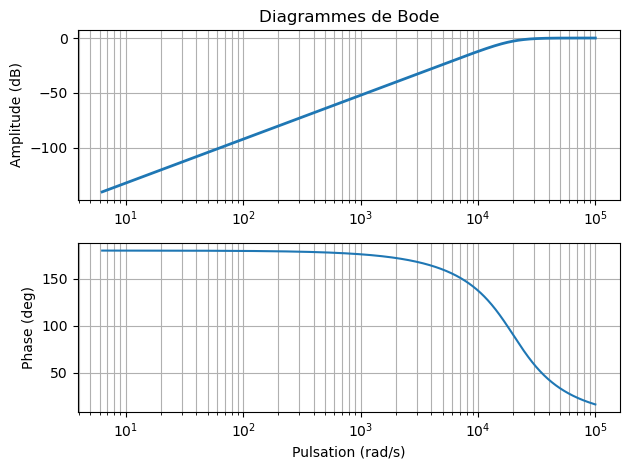

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
 
# Constantes du système
w0=20000
R = 11.11 # Ohms
C=0.000001
L=0.000065
m=(1)/((2/R)*(np.sqrt(L/C)))
 
ft=signal.lti([pow(1/w0,2),0,0],[pow(1/w0,2),(2*m)/w0,1])
# Calcul du diagramme de Bode
omega = np.logspace(0.8, 5, 1000)
w, mag, phase = signal.bode(ft, w=omega)
 
 
# Affichage
plt.subplot(211)
plt.title('Diagrammes de Bode')
plt.semilogx(w, mag, lw=2)    # Amplitude
#plt.xlabel('Pulsation (rad/s)')
plt.ylabel('Amplitude (dB)')
plt.grid(which='both')
 
plt.subplot(212)
plt.semilogx(w, phase)  # Phase
plt.xlabel('Pulsation (rad/s)')
plt.ylabel('Phase (deg)')
plt.grid(which='both')
 
plt.tight_layout()  # Ajuster le placement des courbes
plt.show()

Si on encadre les valeurs de la pulsations $10kHz$ à $100kHz$ pour avoir une meilleure lisibilité lors de la fréquence de coupure :

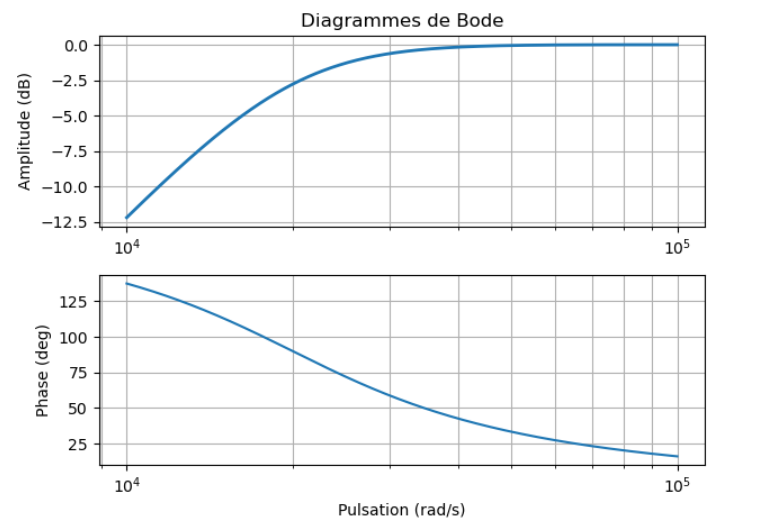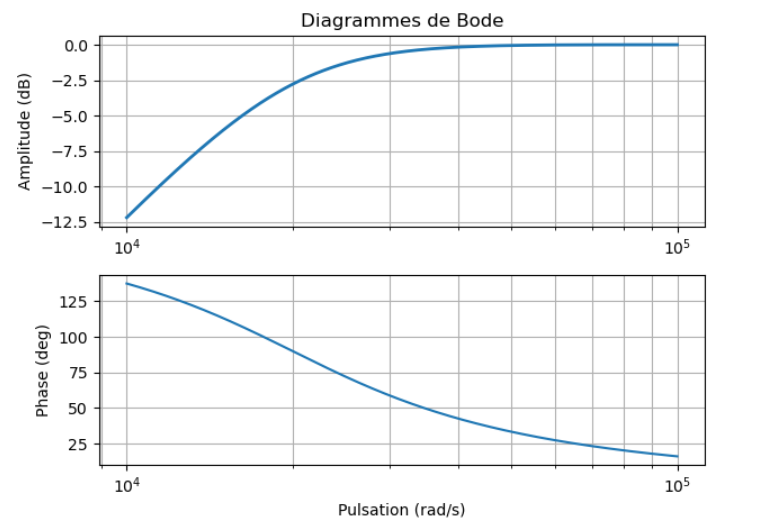

### <ins> Simulation du filtre</inc> :

![Capture d'écran 2025-01-27 121952.png](<attachment:Capture d'écran 2025-01-27 121952.png>)
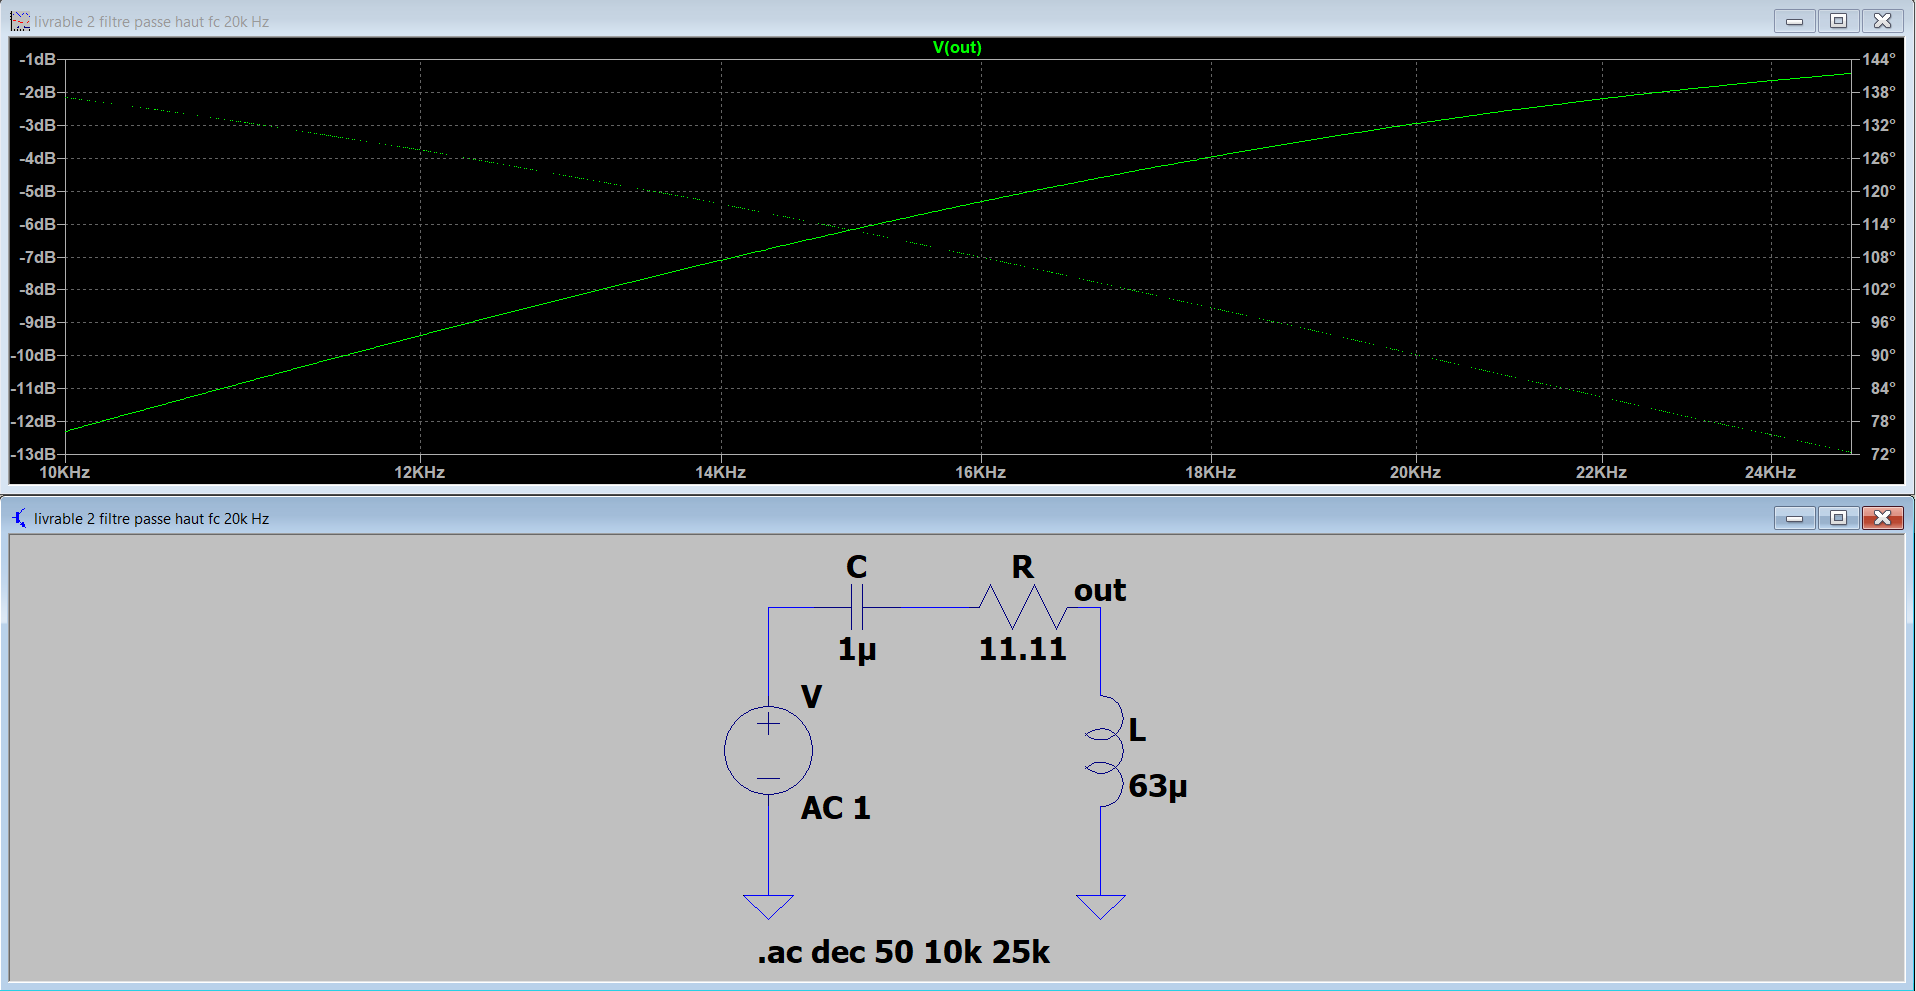

In [24]:
from IPython.display import IFrame
IFrame('https://www.falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWcBOaAOAbAdgCwCYsBmHMBMHZNQkBSGmuhAUwFowwAoAJxEIzXBYMNPALBCo4eBwDGIsRP4LhOKLHgQw0HGgTIMyBHhyFCCDGDzCYcCJA4AbEEsHCXp6+DVxCxnAg8cEjw8MEIsJHsAd15+V1ixZDwoDhj3PgTeDOjMj1zIVRyXcWEsNFUSlLS0ATyy1Tz7AAcQevi2vOo6OjB4Po4AN0ywJPzCrxxGSW7oBA4Aey9LATpJynoYOxBkiEIFkGRwUUk1gUjoTW2D3n2e4+pTjYurziA', width=700, height=350)

Comme nous pouvons le voir sur les simulations,ci-dessus ,la fréquence de coupure est bien respecté (nous le voyons sur le diagramme de Bode) donc notre filtre est fonctionnel (Le circuit sur circuit JS est uniquement théorique d'où le manque de vrais valeurs).